Student: Satish Byrow

#**1. Goal**
- For this project, you have been hired to produce a MySQL database on Movies from a subset of IMDB's publicly available dataset. Ultimately, you will use this database to analyze what makes a movie successful and will provide recommendations to the stakeholder on how to make a successful movie.

#**2. Import and Loading**

## Load Libraries & Functions

In [25]:
#Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):
  """Creates a seaborn countplot with the option to temporarily fill missing values
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
    #Add value above bar
  for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}", fontweight='bold')

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")

  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100

  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  
  return fig, ax

## Load Data

In [36]:
# Open saved file and preview again
tmdb_2000 = pd.read_csv("Data/final_tmdb_data_2000.csv.gz", low_memory = False)
tmdb_2000.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                1005 non-null   object 
 1   adult                  1004 non-null   float64
 2   backdrop_path          612 non-null    object 
 3   belongs_to_collection  92 non-null     object 
 4   budget                 1004 non-null   float64
 5   genres                 1004 non-null   object 
 6   homepage               48 non-null     object 
 7   id                     1004 non-null   float64
 8   original_language      1004 non-null   object 
 9   original_title         1004 non-null   object 
 10  overview               994 non-null    object 
 11  popularity             1004 non-null   float64
 12  poster_path            936 non-null    object 
 13  production_companies   1004 non-null   object 
 14  production_countries   1004 non-null   object 
 15  rele

In [37]:
# Open saved file and preview again
tmdb_2001 = pd.read_csv("Data/final_tmdb_data_2001.csv.gz", low_memory = False)
tmdb_2001.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                296 non-null    object 
 1   adult                  295 non-null    float64
 2   backdrop_path          170 non-null    object 
 3   belongs_to_collection  21 non-null     object 
 4   budget                 295 non-null    float64
 5   genres                 295 non-null    object 
 6   homepage               29 non-null     object 
 7   id                     295 non-null    float64
 8   original_language      295 non-null    object 
 9   original_title         295 non-null    object 
 10  overview               290 non-null    object 
 11  popularity             295 non-null    float64
 12  poster_path            266 non-null    object 
 13  production_companies   295 non-null    object 
 14  production_countries   295 non-null    object 
 15  releas

## Combine Data

In [40]:
#Combine the data sets
df = pd.concat([tmdb_2000, tmdb_2001])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1301 entries, 0 to 295
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                1301 non-null   object 
 1   adult                  1299 non-null   float64
 2   backdrop_path          782 non-null    object 
 3   belongs_to_collection  113 non-null    object 
 4   budget                 1299 non-null   float64
 5   genres                 1299 non-null   object 
 6   homepage               77 non-null     object 
 7   id                     1299 non-null   float64
 8   original_language      1299 non-null   object 
 9   original_title         1299 non-null   object 
 10  overview               1284 non-null   object 
 11  popularity             1299 non-null   float64
 12  poster_path            1202 non-null   object 
 13  production_companies   1299 non-null   object 
 14  production_countries   1299 non-null   object 
 15  relea

In [82]:
df

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.500,22.0,NaN
2,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.450,10.0,NaN
3,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,...,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,4.000,1.0,NaN
4,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,843.0,cn,花樣年華,...,14204632.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.105,2365.0,PG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,tt0237994,0.0,/edJI9Qev6L1wlBhuoQbshQ3BiXx.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...",NaN,51953.0,fr,15 Février 1839,...,0.0,114.0,"[{'english_name': 'French', 'iso_639_1': 'fr',...",Released,NaN,15 Février 1839,0.0,7.233,15.0,NaN
292,tt0238112,0.0,/bEyYqv75jnBfnrkMk2kZB64CFlA.jpg,NaN,57000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,1722.0,en,Captain Corelli's Mandolin,...,62112895.0,131.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,Captain Corelli's Mandolin,0.0,5.944,481.0,R
293,tt0238137,0.0,/hm8LKMSSco60b1SPc3iMoGImFez.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 9648, 'na...",NaN,51986.0,en,Tangled,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The best of friends make the worst of enemies.,Tangled,0.0,5.462,39.0,R
294,tt0238552,0.0,/tCN4UGMvGfYmpTEolOZpso0Od9z.jpg,NaN,17000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 878, 'na...",NaN,10596.0,en,Replicant,...,894844.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"A ruthless killer... to destroy him, they had ...",Replicant,0.0,5.754,418.0,R


## Clean Data

In [90]:
#Check count of revenue and budget > 0
df[["revenue", "budget"]] = (df[["revenue", "budget"]].astype(float))
df=df[df["revenue"] !=0]
df=df[df["budget"] !=0]
df.count()

imdb_id                  244
adult                    242
backdrop_path            240
belongs_to_collection     60
budget                   242
genres                   242
homepage                  35
id                       242
original_language        242
original_title           242
overview                 242
popularity               242
poster_path              242
production_companies     242
production_countries     242
release_date             242
revenue                  242
runtime                  242
spoken_languages         242
status                   242
tagline                  228
title                    242
video                    242
vote_average             242
vote_count               242
certification            221
dtype: int64

## Visualise Data

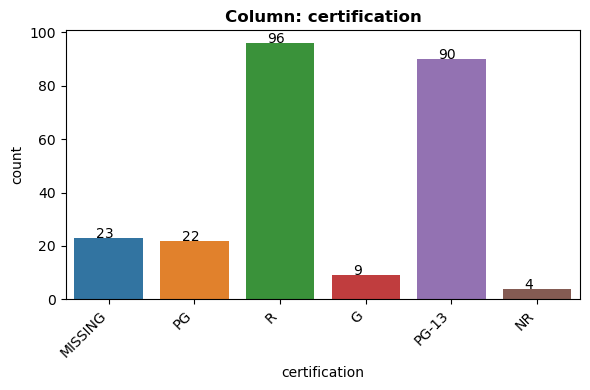

- NaN's Found: 23 (9.43%)
- Unique Values: 6
- Most common value: 'R' occurs 96 times (39.34%)


In [86]:
#Count of movies per certification category
explore_categorical(df,"certification");

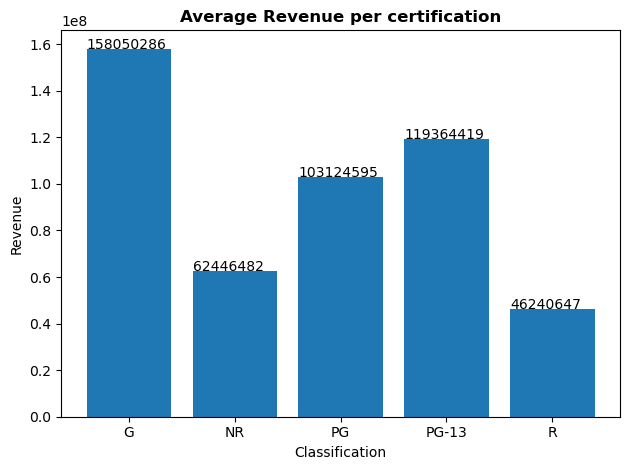

In [89]:
# Use groupby to calculate the average revenue for each classification
df_movie_revenue = df.groupby('certification')['revenue'].mean()

# Plot the average of each as a bar
fig, ax = plt.subplots()
ax.bar(df_movie_revenue.index, df_movie_revenue.values);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x(), p.get_height()+0.01))
ax.set_ylabel('Revenue')
ax.set_xlabel("Classification");
ax.set_title("Average Revenue per certification", fontweight='bold')
# Fix layout and show plot (before print statements)
fig.tight_layout()

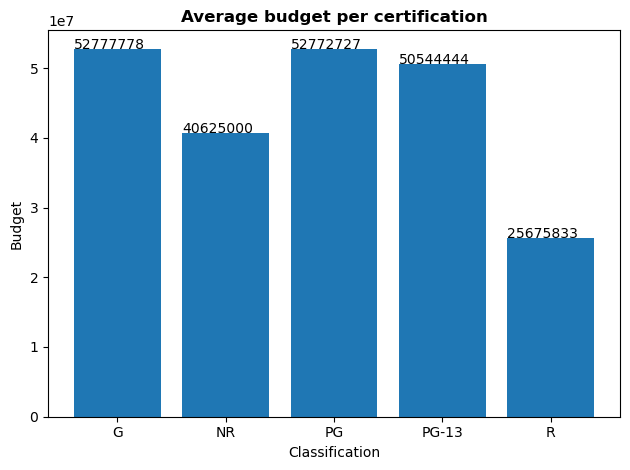

In [88]:
# Use groupby to calculate the average budget for each classification
df_movie_revenue = df.groupby('certification')['budget'].mean()

# Plot the average of each as a bar
fig, ax = plt.subplots()
ax.bar(df_movie_revenue.index, df_movie_revenue.values);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x(), p.get_height()+0.01))
ax.set_ylabel('Budget')
ax.set_xlabel("Classification");
ax.set_title("Average budget per certification", fontweight='bold')
# Fix layout and show plot (before print statements)
fig.tight_layout()

## Save Data

In [91]:
#Write the dataframe to file
FOLDER = "Data/"
df.to_csv(f"{FOLDER}tmdb_results_combined.csv.gz", compression="gzip", index=False)